<a href="https://colab.research.google.com/github/saran237/assignment/blob/main/Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

Loading Dataset From Files

In [16]:
# from google.colab import files
# uploaded = files.upload()

In [17]:
fish=pd.read_csv('/content/fish.csv')
fish

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2
...,...,...,...,...,...,...,...
79,Pike,950.0,48.3,51.7,55.1,16.2,11.2
80,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
81,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
82,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [18]:
fish= pd.read_csv('/content/fish.csv',header= None)
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [19]:
# Assign proper column names
fish.columns = ["Species", "Weight", "Length1", "Length2", "Length3", "Height", "Width"]

# Preview the dataset
print(fish.head())

  Species  Weight  Length1  Length2  Length3  Height  Width
0   Bream   242.0     23.2     25.4     30.0    38.4   13.4
1   Bream   290.0     24.0     26.3     31.2    40.0   13.8
2   Bream   340.0     23.9     26.5     31.1    39.8   15.1
3   Bream   363.0     26.3     29.0     33.5    38.0   13.3
4   Bream   430.0     26.5     29.0     34.0    36.6   15.1


## Preprocessing

In [32]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [21]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  85 non-null     object 
 1   Weight   85 non-null     float64
 2   Length1  85 non-null     float64
 3   Length2  85 non-null     float64
 4   Length3  85 non-null     float64
 5   Height   85 non-null     float64
 6   Width    85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [22]:
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [33]:
fish.isna().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


In [34]:
fish.duplicated().sum()

np.int64(0)

In [36]:
fish.T.duplicated().sum()

np.int64(0)

In [35]:
fish.nunique()

,0
Species,4
Weight,66
Length1,72
Length2,62
Length3,72
Height,69
Width,45


In [23]:
num = fish.select_dtypes(include=['number']).columns.tolist()
print(num)

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


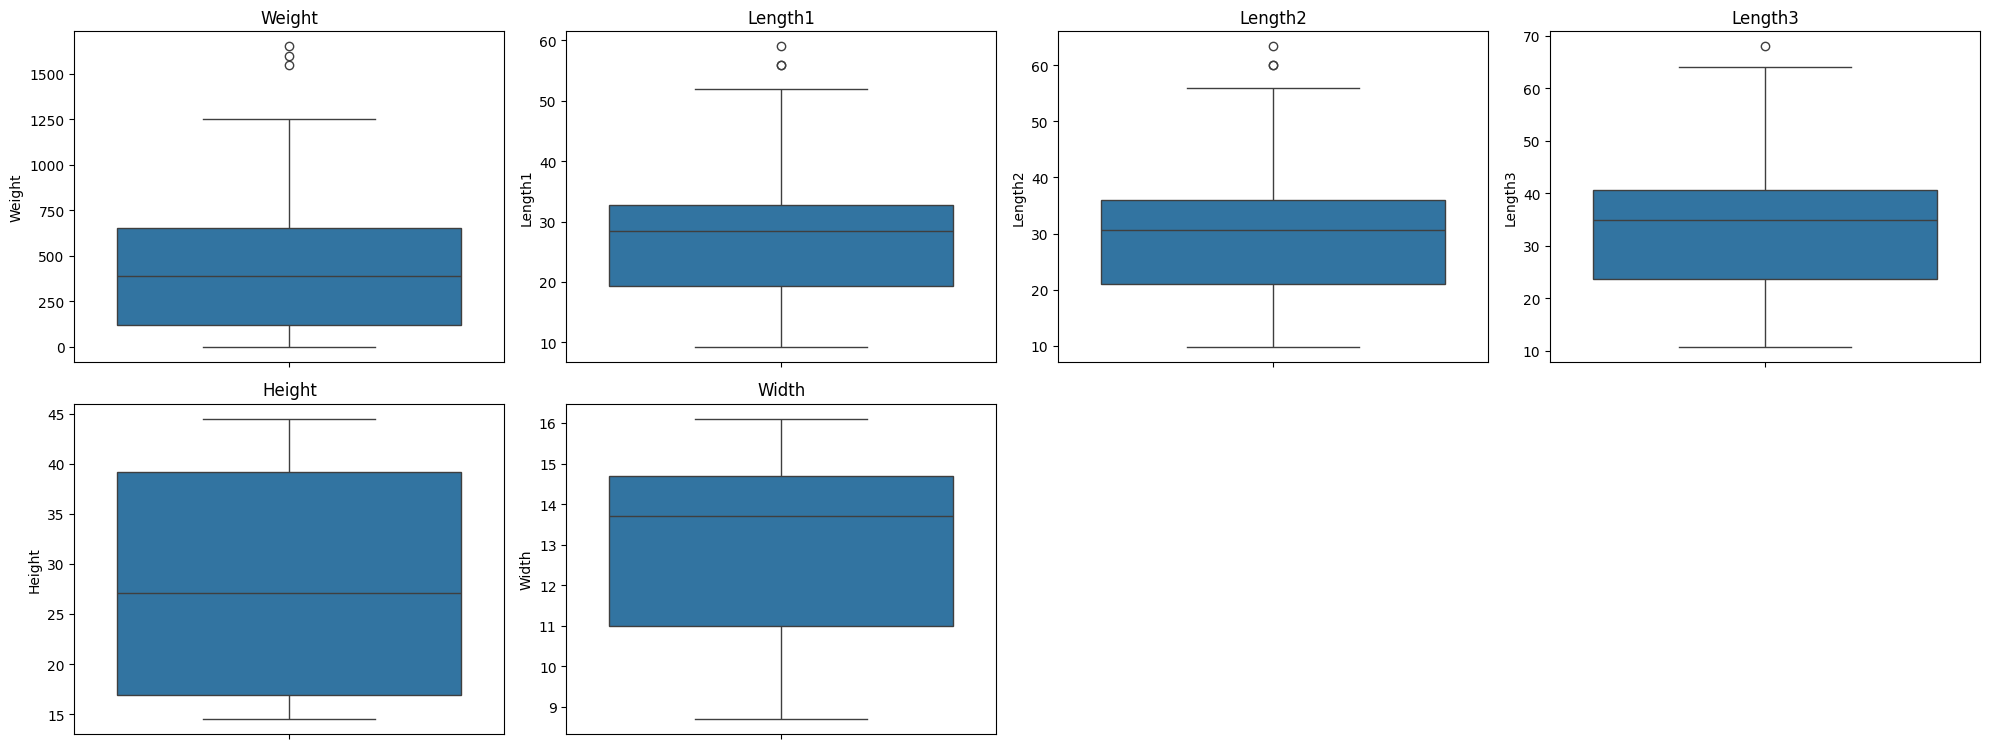

In [24]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num):
    plt.subplot(4, 4, i + 1)  # Arrange subplots in a 4x4 grid
    sns.boxplot(y=fish[col])   # Boxplot for the current column
    plt.title(col)           # Set column name as the title
plt.tight_layout()           # Adjust layout to prevent overlap
plt.show()                   # Display all plots

In [38]:
Q=['Weight', 'Length1', 'Length2', 'Length3','Height','Width']
# Calculate IQR and outlier limits for the specified column
Q1 = fish[Q].quantile(0.25)
Q3 = fish[Q].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR
print(Q1)
print(Q3)
print(IQR)
print(low_limit)
print(up_limit)

Weight     120.0
Length1     19.4
Length2     21.0
Length3     23.7
Height      16.9
Width       11.0
Name: 0.25, dtype: float64
Weight     650.0
Length1     32.7
Length2     36.0
Length3     40.6
Height      39.2
Width       14.7
Name: 0.75, dtype: float64
Weight     530.0
Length1     13.3
Length2     15.0
Length3     16.9
Height      22.3
Width        3.7
dtype: float64
Weight    -675.00
Length1     -0.55
Length2     -1.50
Length3     -1.65
Height     -16.55
Width        5.45
dtype: float64
Weight     1445.00
Length1      52.65
Length2      58.50
Length3      65.95
Height       72.65
Width        20.25
dtype: float64


In [39]:
non_outliers = ~((fish[Q] < low_limit) | (fish[Q] > up_limit)).any(axis=1)

In [40]:
fish_new=fish[non_outliers]

In [41]:
fish.shape

(85, 7)

In [42]:
fish_new.shape

(82, 7)

# K Means

In [45]:
x=fish_new.drop('Species', axis=1)
x

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...
77,500.0,42.0,45.0,48.0,14.5,10.2
78,567.0,43.2,46.0,48.7,16.0,10.0
79,770.0,44.8,48.0,51.2,15.0,10.5
80,950.0,48.3,51.7,55.1,16.2,11.2


In [47]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(fish_new.drop('Species',axis=1))
  wcss.append(kmeans.inertia_)

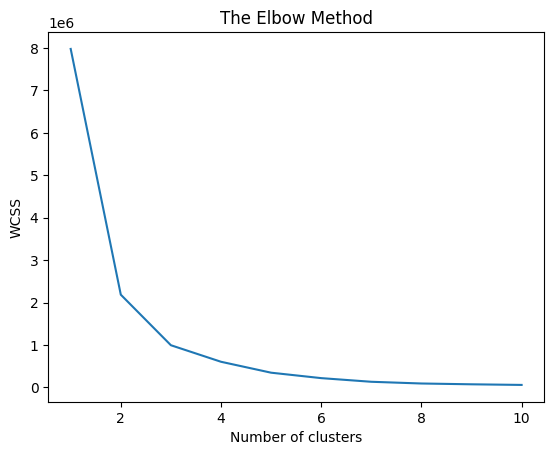

In [48]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
#from the elbow plot , we can fix values of k as 3
#building the kmeans clustering model
kmeans= KMeans(n_clusters=3, init='k-means++') #max_iter can be set if we need to fix the number of iterations
y_kmeans= kmeans.fit_predict(x) #output generation

In [50]:
x['Cluster']=y_kmeans
x.head()

,Weight,Length1,Length2,Length3,Height,Width,Cluster
0,242.0,23.2,25.4,30.0,38.4,13.4,2
1,290.0,24.0,26.3,31.2,40.0,13.8,1
2,340.0,23.9,26.5,31.1,39.8,15.1,1
3,363.0,26.3,29.0,33.5,38.0,13.3,1
4,430.0,26.5,29.0,34.0,36.6,15.1,1


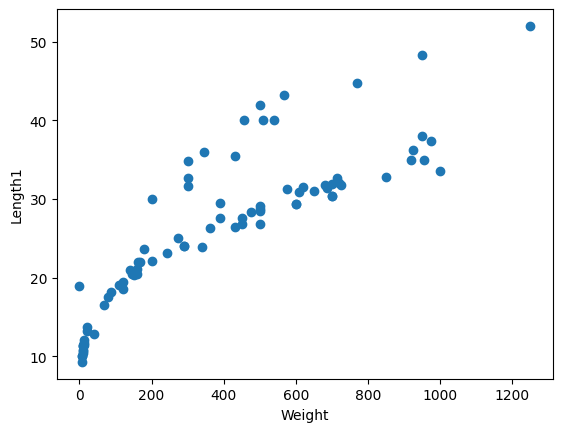

In [53]:
#before clustering
plt.scatter(x['Weight'],x['Length1'])
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

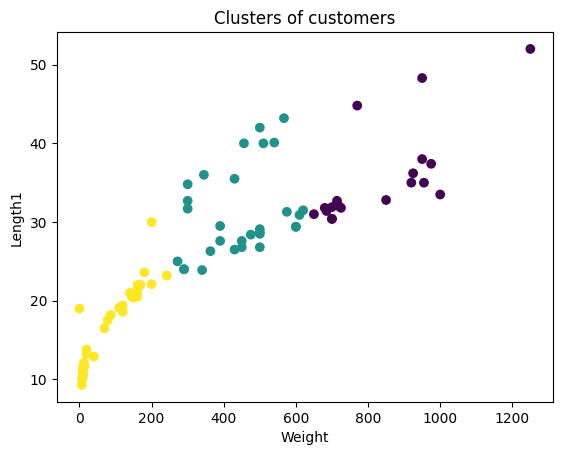

In [55]:

#after clustering
plt.scatter(x['Weight'],x['Length1'], c= x['Cluster'])
plt.title('Clusters of customers')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

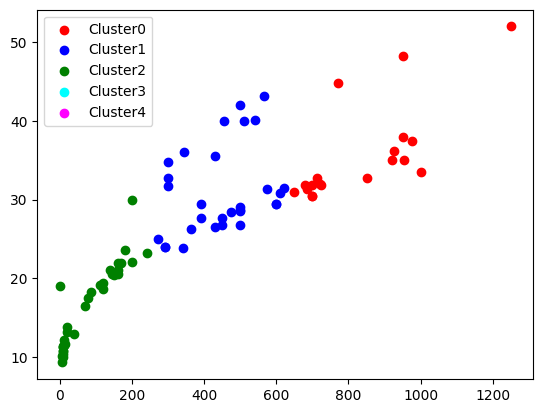

In [57]:
colors= ['red','blue','green','cyan','magenta']
for i in range(5):
  cluster_data= x[y_kmeans==i]
  plt.scatter(x[x['Cluster']==i]['Weight'],
              x[x['Cluster']==i]['Length1'],
              c=colors[i],label=f'Cluster{i}')
plt.legend()

In [58]:
#predict the cluster
def predict_cluster(a,b,c,d,e,f):
  new_data= [[a,b,c,d,e,f]]
  cluster=kmeans.predict(new_data)
  return cluster[0]

In [59]:
predicted_cluster= predict_cluster(50,100,20,30,40,15)
print("the values belong to the cluster",predicted_cluster)

the values belong to the cluster 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# Agglomerative Hierarchical Clustering


In [62]:
ag_cluster =linkage(x,method='ward') #ward, singlee, centroid
#linkage matrix i.e; agglomerative cluster model

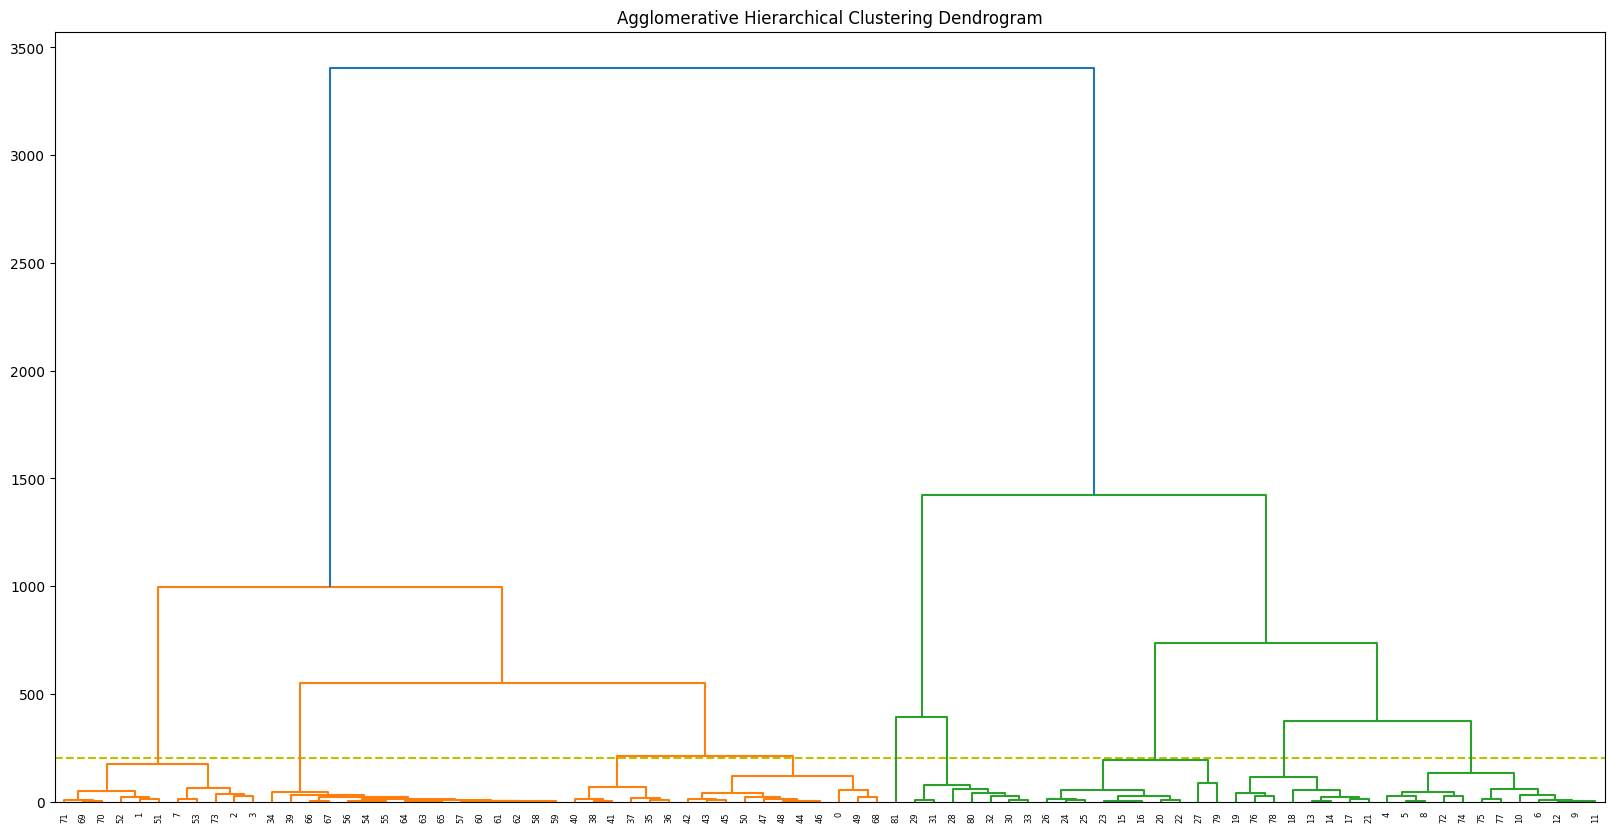

In [63]:
plt.figure(figsize=(20,10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.axhline(y=200, color='y',linestyle='--')
dendrogram(ag_cluster)
plt.show()

In [64]:

cluster_labels=fcluster(ag_cluster, t=200, criterion='distance')
x['cluster_agglomerative']= cluster_labels
x.head()

,Weight,Length1,Length2,Length3,Height,Width,Cluster,cluster_agglomerative
0,242.0,23.2,25.4,30.0,38.4,13.4,2,4
1,290.0,24.0,26.3,31.2,40.0,13.8,1,1
2,340.0,23.9,26.5,31.1,39.8,15.1,1,1
3,363.0,26.3,29.0,33.5,38.0,13.3,1,1
4,430.0,26.5,29.0,34.0,36.6,15.1,1,9


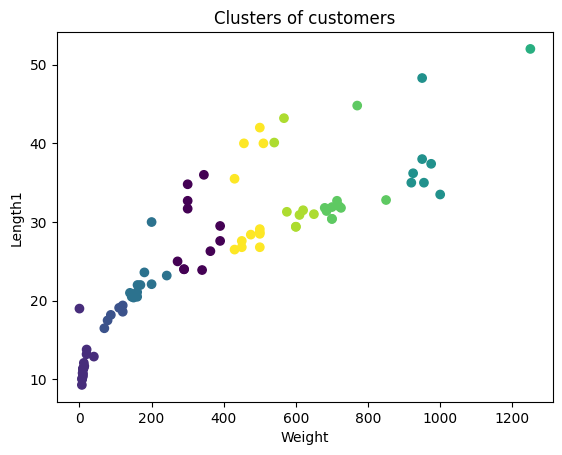

In [66]:
#after clustering
plt.scatter(x['Weight'],x['Length1'], c= x['cluster_agglomerative'])
plt.title('Clusters of customers')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

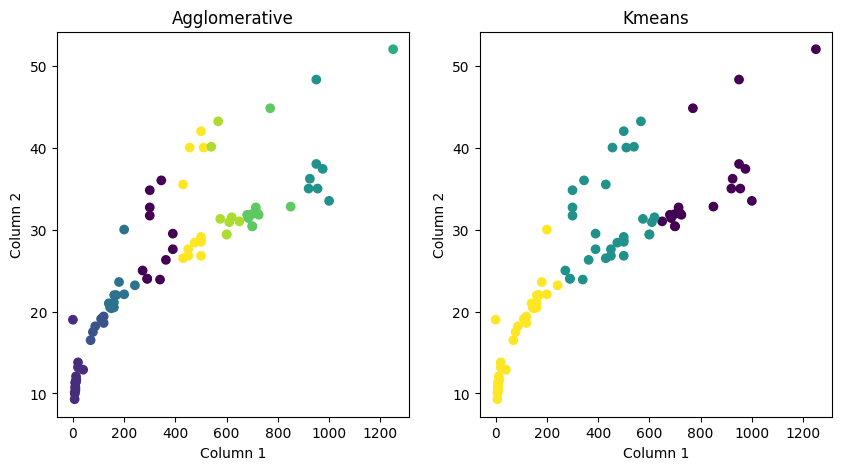

In [67]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x['Weight'],x['Length1'], c= x['cluster_agglomerative'])
plt.title('Agglomerative')
plt.xlabel('Column 1')
plt.ylabel('Column 2')

plt.subplot(1,2,2)
plt.scatter(x['Weight'],x['Length1'], c= x['Cluster'])
plt.title('Kmeans')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()